# Analisis Customer Segmentation Data TransJakarta
Dataset berisi 189.500 baris data transaksi penumpang TransJakarta dengan 21 kolom, mencakup informasi tentang:

* Identitas transaksi dan kartu pengguna
* Informasi demografis pengguna
* Waktu dan lokasi naik/turun
* Rute dan arah perjalanan
* Tarif yang dibayarkan




Tujuan Bisnis
* Optimalisasi Rute dan Armada:
Menentukan koridor dan halte dengan kepadatan tertinggi/rendah → redistribusi armada secara efisien.
* Perbaikan Layanan:
Mengetahui jam sibuk → meningkatkan frekuensi keberangkatan di jam tertentu.
* Peningkatan Kepuasan Pelanggan:
Analisis demografi pengguna → pengembangan program loyalitas/subsidi yang tepat sasaran.
* Pengurangan Waktu Tempuh:
Mengidentifikasi perjalanan dengan durasi tidak normal → investigasi operasional.


## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.dates as mdates

### Access to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = data_path = '/content/drive/MyDrive/Dibimbing/ASSIGMENT/Final Project/'

Mounted at /content/drive


### Read Data

In [ ]:
file_name = path + 'dfTransjakarta180kRows.csv'
df = pd.read_csv(file_name)

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.89165,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.86298,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.99215,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0
3,ZZBX143N6N83HQ,4486493302356581,dki,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.78213,16,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.76889,26.0,2023-04-03 06:01:25,3500.0
4,EWEG491A2W45DR,30139379978125,bni,"dr. Mulyanto Pudjiastuti, M.Ak",F,1997,NaN,NaN,0.0,NaN,...,106.83514,2,2023-04-03 06:00:54,B02755P,Perpustakaan Nasional,-6.180673,106.82643,5.0,2023-04-03 06:47:32,3500.0


In [ ]:
# Cek Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189500 entries, 0 to 189499
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transID           189500 non-null  object 
 1   payCardID         189500 non-null  int64  
 2   payCardBank       189500 non-null  object 
 3   payCardName       189500 non-null  object 
 4   payCardSex        189500 non-null  object 
 5   payCardBirthDate  189500 non-null  int64  
 6   corridorID        182520 non-null  object 
 7   corridorName      175972 non-null  object 
 8   direction         189500 non-null  float64
 9   tapInStops        182259 non-null  object 
 10  tapInStopsName    189500 non-null  object 
 11  tapInStopsLat     189500 non-null  float64
 12  tapInStopsLon     189500 non-null  float64
 13  stopStartSeq      189500 non-null  int64  
 14  tapInTime         189500 non-null  object 
 15  tapOutStops       177131 non-null  object 
 16  tapOutStopsName   18

| Kolom                                     | Deskripsi                                         |
| ----------------------------------------- | ------------------------------------------------- |
| transID                                 | ID unik untuk tiap transaksi                      |
| payCardID                               | Nomor kartu pembayaran                            |
| payCardBank                            | Nama bank penerbit kartu (e.g., DKI, BNI, Emoney) |
| payCardName                             | Nama pengguna pada kartu                          |
| payCardSex                              | Jenis kelamin (M/F)                               |
| payCardBirthDate                        | Tahun lahir pengguna (format: YYYY)               |
| corridorID                              | ID koridor TransJakarta                           |
| corridorName                            | Nama koridor (misal: “Pulo Gadung 2 - Tosari”)    |
| direction                               | Arah perjalanan (biasanya 0 atau 1)               |
| tapInStops, tapOutStops               | Kode halte tempat naik dan turun                  |
| tapInStopsName, tapOutStopsName       | Nama halte tempat naik dan turun                  |
| tapInStopsLat/Lon, tapOutStopsLat/Lon | Koordinat halte naik dan turun                    |
| stopStartSeq, stopEndSeq              | Urutan halte dari awal rute                       |
| tapInTime, tapOutTime                 | Waktu tap in dan tap out (format datetime)        |
| payAmount                               | Besarnya tarif yang dibayarkan (dalam rupiah)     |


### Data Cleansing

#### Convert Data Type

In [ ]:
# Convert date coloum into proper datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

#### Cek Duplicate

In [ ]:
# Cek Duplicate
df.duplicated().sum()

np.int64(0)

#### Cek Missing Value

In [ ]:
# Cek missing value
df.isna().sum().value_counts()

,count
0,12
6720,5
6980,1
13528,1
7241,1
12369,1
3718,1


In [ ]:
missing_report = pd.DataFrame({
    "Missing Values": df.isna().sum(),
    "Percent Missing": (df.isna().sum()/len(df)*100).round(2)
}).sort_values(by="Missing Values", ascending=False)

missing_report

,Missing Values,Percent Missing
corridorName,13528,7.14
tapOutStops,12369,6.53
tapInStops,7241,3.82
corridorID,6980,3.68
tapOutStopsLat,6720,3.55
tapOutStopsLon,6720,3.55
stopEndSeq,6720,3.55
tapOutTime,6720,3.55
tapOutStopsName,6720,3.55
payAmount,3718,1.96


In [ ]:
# Menghapus baris dengan missing value pada kolom-kolom informasi halte turun
cols = ['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','corridorID','corridorName','tapInStops','tapOutStops','payAmount']
df = df.dropna(subset=cols)


final_missing = df.isnull().sum()
final_missing = final_missing[final_missing > 0]

#Jumlah data setelah pembersiahan
final_missing_clean = df.shape
final_missing, final_missing_clean

(Series([], dtype: int64), (153963, 22))

In [ ]:
# Cek missing value
df.isnull().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


### Cek Outlier

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

#### Cek Outlier payAmount
* Alasan: Seharusnya berada dalam rentang wajar (misal Rp 0 – Rp 3.500)
* Outlier: Bisa disebabkan karena kesalahan input (misal Rp 20.000)
* Tindakan: Identifikasi nilai ekstrem tinggi/rendah

In [ ]:
# Batas payAmount
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'payAmount')
occup_upper_limit, occup_lower_limit

(np.float64(8750.0), np.float64(-5250.0))

In [ ]:
df.shape

(153963, 22)

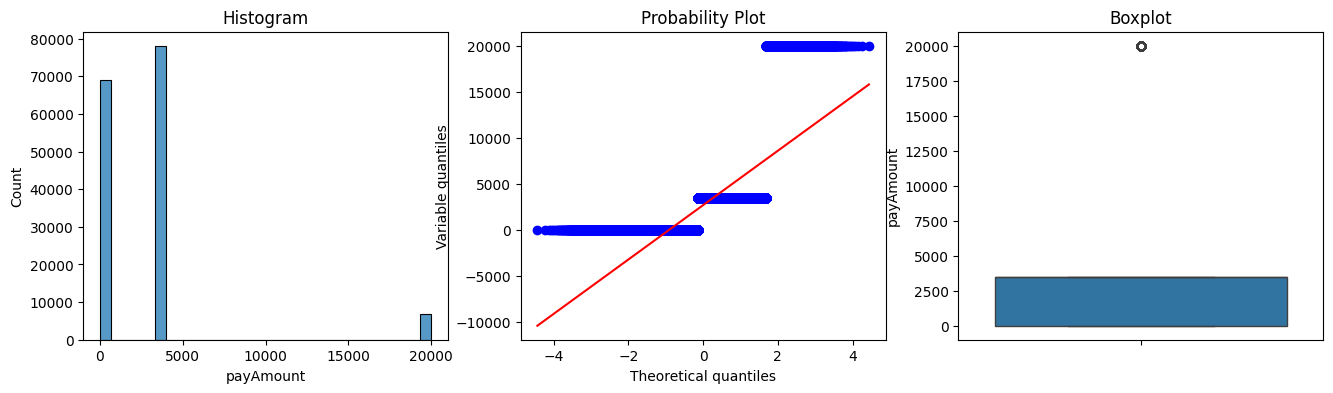

In [ ]:
check_plot(df, 'payAmount')

In [ ]:
# Trimming atau drop value outlier -> pengurangan baris
# Trimming outliers from the training data
data_clean = df[(df['payAmount'] <= occup_upper_limit) & (df['payAmount'] >= occup_lower_limit)]

In [ ]:
# Batas payAmount
occup_upper_limit, occup_lower_limit = find_outlier_boundary(data_clean, 'payAmount')
occup_upper_limit, occup_lower_limit

(np.float64(8750.0), np.float64(-5250.0))

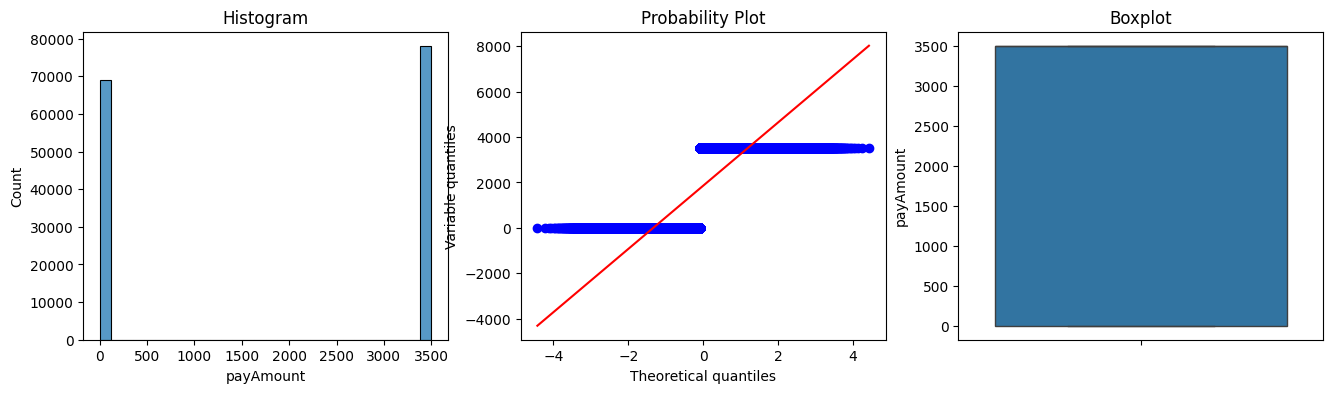

In [ ]:
check_plot(data_clean, 'payAmount')

In [ ]:
data_clean.shape

(147009, 22)

## Save Clean Data

In [ ]:
data_clean.to_csv(path + 'Clean_Transjakarta.csv', index=False)

## EDA

### Distribusi Usia

/tmp/ipython-input-1382414127.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette=colors)


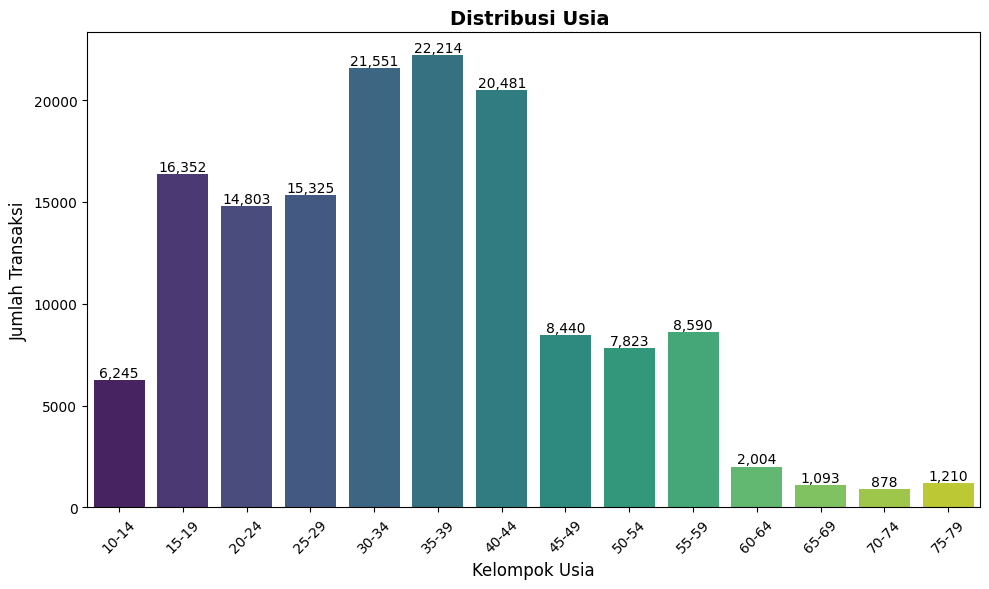

In [ ]:
data_clean['age'] = 2025 - data_clean['payCardBirthDate']

# Filter usia >= 10
data_clean = data_clean[data_clean['age'] >= 10]

# Buat bin per 5 tahun
bins = list(range(10, data_clean['age'].max() + 6, 5))  # +6 supaya ujungnya ikut
labels = [f"{b}-{b+4}" for b in bins[:-1]]
data_clean['age_group'] = pd.cut(data_clean['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah transaksi per group usia
age_group_counts = data_clean['age_group'].value_counts().sort_index()

# Plot gradasi warna
plt.figure(figsize=(10,6))
colors = sns.color_palette("viridis", len(age_group_counts))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette=colors)

# Label angka di atas batang
for i, v in enumerate(age_group_counts.values):
    ax.text(i, v + 10, f"{v:,}", ha='center', va='bottom', fontsize=10)

plt.title("Distribusi Usia ", fontsize=14, fontweight='bold')
plt.xlabel("Kelompok Usia", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribusi Gender

/tmp/ipython-input-3295131521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['payCardSex'] = data_clean['payCardSex'].replace({'M': 'Male', 'F': 'Female'})


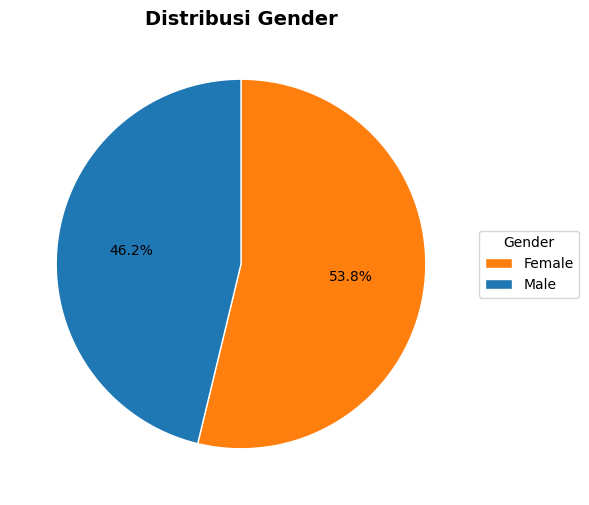

In [ ]:
# Ubah label gender
data_clean['payCardSex'] = data_clean['payCardSex'].replace({'M': 'Male', 'F': 'Female'})

# Hitung distribusi gender
gender_counts = data_clean['payCardSex'].value_counts()

# Tentukan warna sesuai urutan index
color_map = {'Male': '#1f77b4',  # Biru
             'Female': '#ff7f0e'}  # Oranye
colors = [color_map[gender] for gender in gender_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)

# Tambahkan legend
plt.legend(
    wedges,
    gender_counts.index,
    title="Gender",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribusi Gender", fontsize=14, fontweight='bold')
plt.show()

### Distribusi Metode Pembayaran


/tmp/ipython-input-3831529461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data_clean, x='payCardBank', palette='Set1', order=data_clean['payCardBank'].value_counts().index)


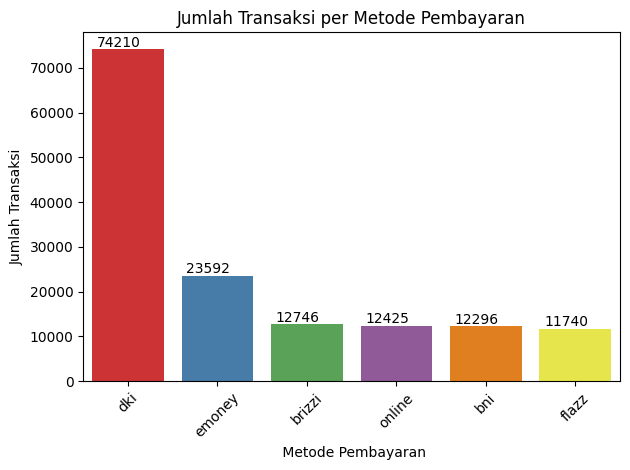

In [ ]:
plt.figure()
ax = sns.countplot(data=data_clean, x='payCardBank', palette='Set1', order=data_clean['payCardBank'].value_counts().index)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.05, p.get_height() + 500), fontsize=10)
plt.title("Jumlah Transaksi per Metode Pembayaran")
plt.xlabel(" Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Halte Populer

/tmp/ipython-input-604405938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_halte.index, y=top_halte.values, palette='Set2')


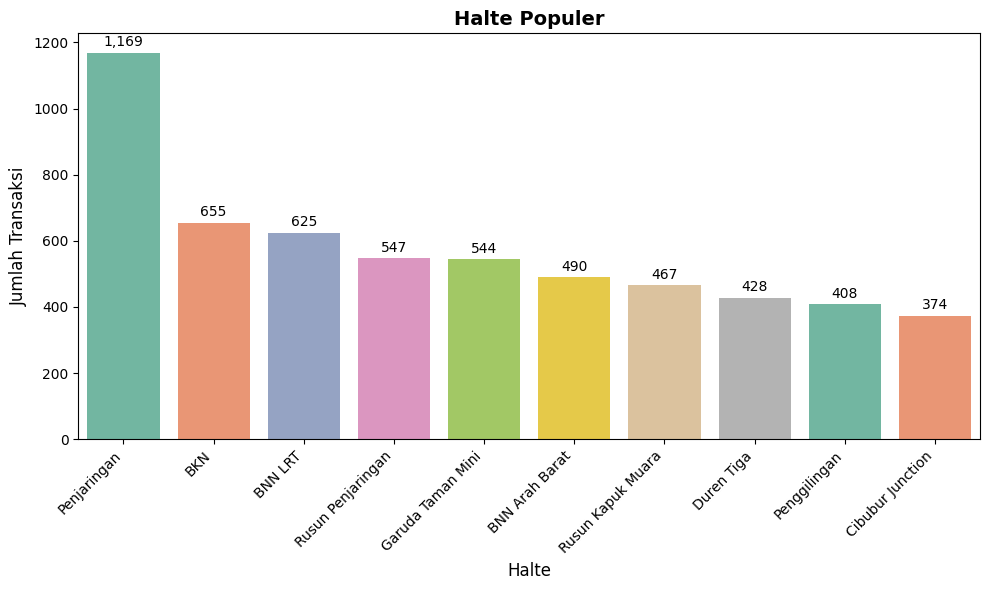

In [ ]:
# Ambil 10 halte terpopuler
top_halte = data_clean['tapInStopsName'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_halte.index, y=top_halte.values, palette='Set2')

# Tambahkan label value count di atas batang
for i, v in enumerate(top_halte.values):
    ax.text(i, v + 10, f"{v:,}", ha='center', va='bottom', fontsize=10, )

plt.title("Halte Populer", fontsize=14, fontweight='bold')
plt.xlabel("Halte", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Revenue Harian April 2023

/tmp/ipython-input-966870383.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day', y='payAmount', data=dayly_revenue, palette=colors)


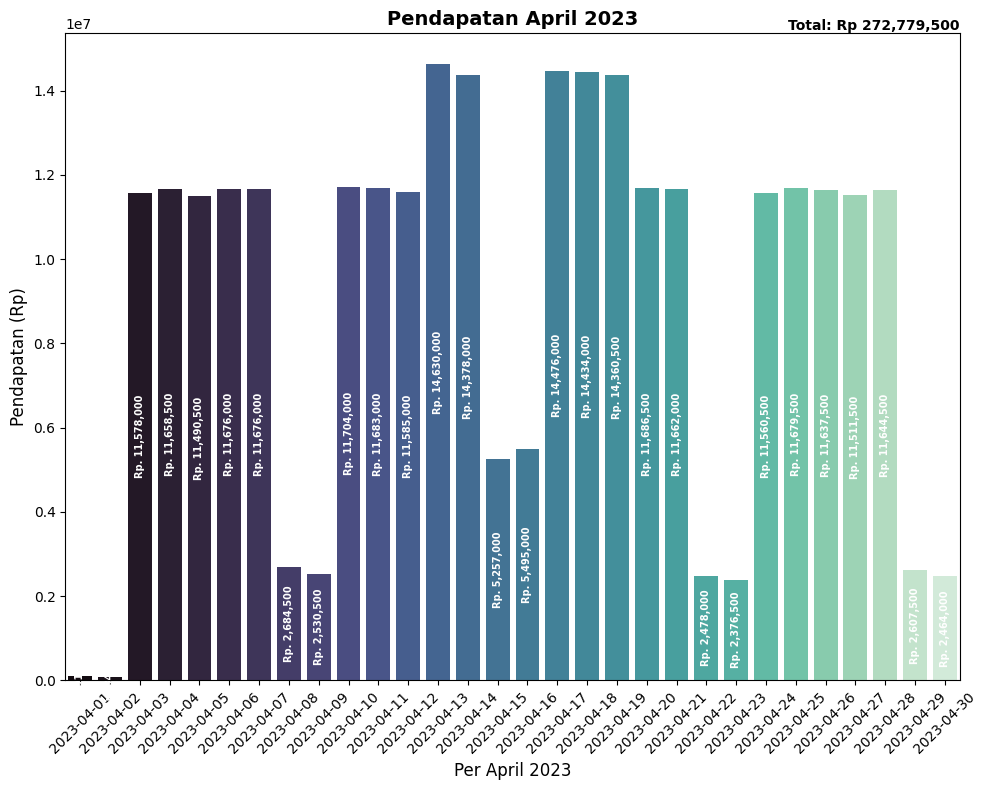

In [ ]:
# Pastikan format datetime
data_clean['tapInTime'] = pd.to_datetime(data_clean['tapInTime'])

# Ambil hari
data_clean['day'] = data_clean['tapInTime'].dt.to_period('D')

# Hitung pendapatan per hari
dayly_revenue = data_clean.groupby('day')['payAmount'].sum().reset_index()
dayly_revenue['day'] = dayly_revenue['day'].astype(str)

# Plot
plt.figure(figsize=(10,8))
colors = sns.color_palette("mako", len(dayly_revenue))
ax = sns.barplot(x='day', y='payAmount', data=dayly_revenue, palette=colors)
for i, v in enumerate(dayly_revenue['payAmount']):
    ax.text(i, v * 0.5,  # posisi vertikal di tengah batang
            f"Rp. {v:,.0f}",
            ha='center', va='center',
            fontsize=7, color='white',
            rotation=90, rotation_mode='anchor', fontweight='bold')

# Hitung total pendapatan
total_revenue = dayly_revenue['payAmount'].sum()

# Tulis total di pojok kanan atas
ax.text(len(dayly_revenue) - 0.5,   # posisi x di ujung kanan
        dayly_revenue['payAmount'].max() * 1.05,  # posisi y sedikit di atas batang tertinggi
        f"Total: Rp {total_revenue:,.0f}",
        ha='right', va='bottom',
        fontsize=10, fontweight='bold', color='black')

plt.title("Pendapatan April 2023", fontsize=14, fontweight='bold')
plt.xlabel("Per April 2023", fontsize=12)
plt.ylabel("Pendapatan (Rp)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ridership by Days

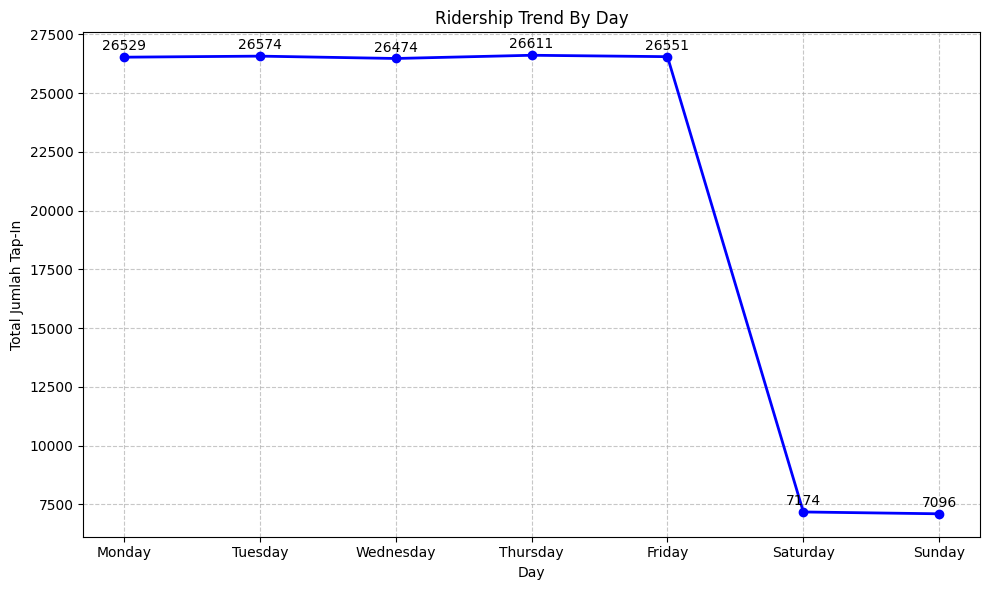

In [ ]:
# --- Modifikasi untuk Hari dalam Seminggu ---

# Mengekstrak nama hari dalam seminggu (misal: 'Monday', 'Tuesday')
data_clean['dayOfWeek'] = data_clean['tapInTime'].dt.strftime('%A')

# Menghitung jumlah tap-in per hari dalam seminggu
daily_tap_ins_by_weekday = data_clean.groupby('dayOfWeek').size().reset_index(name='TotalTapIn')

# Mengurutkan hari dalam seminggu secara kronologis (Senin-Minggu)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_tap_ins_by_weekday['dayOfWeek'] = pd.Categorical(
    daily_tap_ins_by_weekday['dayOfWeek'],
    categories=weekday_order,
    ordered=True
)

# Urutkan DataFrame berdasarkan kategori hari
daily_tap_ins_by_weekday = daily_tap_ins_by_weekday.sort_values('dayOfWeek')

# Membuat Line Chart
plt.figure(figsize=(10, 6))

# Menggunakan plt.plot untuk line chart
# Karena sumbu X adalah kategori, matplotlib akan secara otomatis menanganinya sebagai indeks numerik
# dan menggunakan label kategori yang kita berikan.
plt.plot(daily_tap_ins_by_weekday['dayOfWeek'], daily_tap_ins_by_weekday['TotalTapIn'],
         marker='o',      # Menambahkan penanda pada setiap titik data
         linestyle='-',   # Menghubungkan titik-titik dengan garis
         color='blue',    # Warna garis
         linewidth=2      # Ketebalan garis
        )

# Menambahkan judul dan label
plt.title('Ridership Trend By Day')
plt.xlabel('Day')
plt.ylabel('Total Jumlah Tap-In')

# Menambahkan grid untuk keterbacaan yang lebih baik
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai di setiap titik (opsional, bisa membuat chart ramai jika banyak titik)
for i, txt in enumerate(daily_tap_ins_by_weekday['TotalTapIn']):
    plt.annotate(txt, (daily_tap_ins_by_weekday['dayOfWeek'].iloc[i], daily_tap_ins_by_weekday['TotalTapIn'].iloc[i]),
                 textcoords="offset points", xytext=(0,5), ha='center')


# Menampilkan chart
plt.tight_layout() # Menyesuaikan layout agar tidak ada label yang terpotong
plt.show()
